## Lab 2A: Ideal Gas Law, Constant Pressure (Trial 1)
<bk>

Shreya Parjan
<bk>
9/17/18

The objective of this lab is to explore the relationship between temperature and volume at constant pressure using the Ideal Gas Law. By collecting data on the expansion of a gas's volume as it is heated, we can quantify the direct relationship between temperature and volume of a gas at constant pressure. We know that the gas will expand when heated at constant pressure because the gas molecules will receive thermal energy and need to occupy a larger volume to maintain pressure.



### Relevant imports for analysis: numpy, matplotlib.pyplot and %matplotlib inline.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline

### Raw data.

In [17]:
tempRoom = 21.0 #degrees celsius

rTube = 0.15875 #cm (converted from actual value rTube = 1/16 in)
hTube = 32 #height, since we're treating the tube like a cylinder (cm)

flaskVol = 29 #cm^3
tempFlask = np.array([21,22,27,30,31,37,40,44,45,51,52,54,58,64,66,68,72]) #degrees celsius

volSyringe = np.array([0.2,1.0,1.5,1.8,2.0,2.1,2.5,2.8,3.0,3.2,3.5,3.8,4.0,4.2,4.5,4.8,5.0]) #cm^3

### Analysis Code.  This block is for the SECOND ROUND of data with constant pressure.

In [18]:
tubeVol = np.pi*rTube**2*hTube
volTube = np.ones(17)*tubeVol

volFlask = np.ones(17)*flaskVol #converts integer flaskVol to an array

volTotal = volFlask + volSyringe + volTube

#calculates weighted syringe temp
tempWeightedSyringe = np.ones(17)
for i in range(len(volSyringe)):
    tempWeightedSyringe[i] = tempRoom/volSyringe[i]

#examines tube in 2 different parts: that at syringe temp and that at flask temp
percentTubeAtSyringeTemp = 1
percentTubeAtFlaskTemp = 0.0

#creates arrays for unweighted temperatures of the 3 components of the setup
tempSyringeTube = np.ones(17)
tempFlaskTube = np.ones(17)
tempTube = np.ones(17)

#creates arrays to calculate the weighted temperature of the 3 components of the setup
totalTempTube = np.ones(17)
totalTempFlask = (1/volTotal)*(tempFlask*volFlask)
totalTempSyringe = (1/volTotal)*(tempRoom*volSyringe)

for j in range(len(tempSyringeTube)):
    tempSyringeTube[j] = tempRoom
    tempFlaskTube[j] = tempFlask[j]
    tempTube[j] = (percentTubeAtSyringeTemp*tempSyringeTube[j])+(percentTubeAtFlaskTemp*tempFlaskTube[j])
    totalTempTube[j] = (1/volTotal[j])*(tempTube[j]*volTube[j])

#calculates total weighted temperature of setup
totalTemp = totalTempFlask + totalTempSyringe + totalTempTube

#for testing purposes, prints various calculated values
#print('temp tube = ',tempTube)
#print('vol total = ', volTotal)
#print('total temp = ', totalTemp)

### This cell produces a graph of Total Volume vs. Weighted Temperature for Trial 2.

y-intercept =  -281.2558351521265
slope =  9.365074396218294
uncertainties:  [12.76118929  0.36994554]


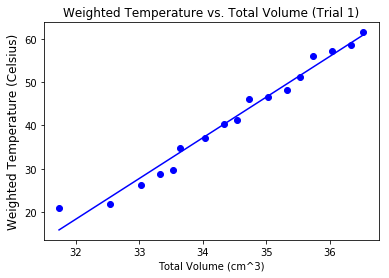

In [19]:
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, volTotal, totalTemp)
yIntercept = popt[0]
slope = popt[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

volTotal_for_plot = np.linspace(volTotal.min(), volTotal.max(), 50)
best_fit_line = straight_line_model(volTotal_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

plt.plot(volTotal, totalTemp, 'bo') #without '-' after bo, plots points alone
plt.plot(volTotal_for_plot, best_fit_line, 'b') # adds best fit line

plt.xlabel('Total Volume (cm^3)') # label the x-axis
plt.ylabel('Weighted Temperature (Celsius)', size=12) # label the y-axis

plt.title('Weighted Temperature vs. Total Volume (Trial 1)') # title
plt.show()

### Answers to questions and conclusions from Trial 1.
1. Temperature when volume approaches 0 (and uncertainty)
    
    When the volume approaches 0, the line will approach its y-intercept. Using the popt array, the y-intercept of the equation is -330 degrees Celsius +/- 10.
    
    
2. Initial assumption for temperature in tubing
    
    We calculuate a weighted temperature when examining the temperature of the gas inside the connecting tube because it varies relative to whether it is closer to the flask (a volume at greater than room temperature) or the syringe (a volume at roughly room temperature).
    
    The total volume is the sum of the volume in the flask + the volume in the syringe + the volume in the tube. We can approximate the volume of the tube by treating it as a cylinder with 0.0015875 m and h = 0.32 m.
    
    We'll calculate the weighted temperature of the tube in 2 cases. Case 1 is where approx. 1/3 of the tube's temperature is that of the flask and approx. 2/3 is that of the syringe.
    
    
3. Second assumption for temperature in tubing 
    
    Case 2 is where approx. 2/3 of the tube's temperature is that of the flask and approx. 1/3 varies is that of the syringe (approx room temp).
    
    3a. Recalculated value for absolute zero
    
      After switching the values for how much of the tube's temperature relative to the temperatures of the flask and syringe, I obtained -300 degrees Celsius +/- 10 for absolute zero.
      
4. Third assumption for temperature in tubing 

    Case 3 is where 100% of the tube's temperature is that of the syringe, or room temperature.
    
    4a. Recalculated value for absolute zero.
    
      After setting the value for percentTubeAtSyringeTemp to 1 (corresponding to 100% at room temp) I obtained -280 degrees celsius +/- 10 for absolute zero.
      
Conclusion:
The positive slope of the line of best fit suggests that there is a direct relationship between volume and temperature when pressure is held constant. More data points would help reduce the uncertainty in the measurements, however, the residuals demonstrate that the line of best fit accounts for some of the variation in data. We have established that absolute zero is at the y-intercept of the line as we approach a total volume of 0 cm^3 but it varies depending on whether more of the tube's temperature mirrors that of the flask or the syringe. The actual value for absolute zero is between 10 and 60 degrees C less than our measured values, error that may be the result of an outlier at our first data point that may be effecting the line of best fit. When 100% of the tubing is assumed to be at room temperature, we obtain the value closest to the true value for absolute zero, -273.15 degrees Celsius. With this assumption, with a slope of about 9.37, the line of best fit suggests that for the gas, every 1 cm^3 increase in volume is followed by a corresponding temperature increase of 9.37 degrees Celsius. 

Rename the Notebook and download it as a Notebook (.ipynb).
<bk>
Send to your Dropbox.